<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Deep%20Learning/Previsao_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 8 color = 'green'>Previsão com Keras</font>

#Sobre o Autor e o Notebook
Neste notebook contém estudos a respeito de regressão utilizando deep learning, com objetivo de realizar uma previsão numa time series(series temporais)

<font size =4> Autor: Kaue Hermann Abbehausen</font>

<font size =4> Linkedin: https://www.linkedin.com/in/kaue-abbehausen-5b1922165/</font>

Fontes:
1. Curso Deep Learnin: Previsão com Keras; Alura

# Bibliotecas e Dados



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
passageiros =  pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
passageiros.head(10)

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148
8,1949.666667,136
9,1949.750000,119


In [3]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 14

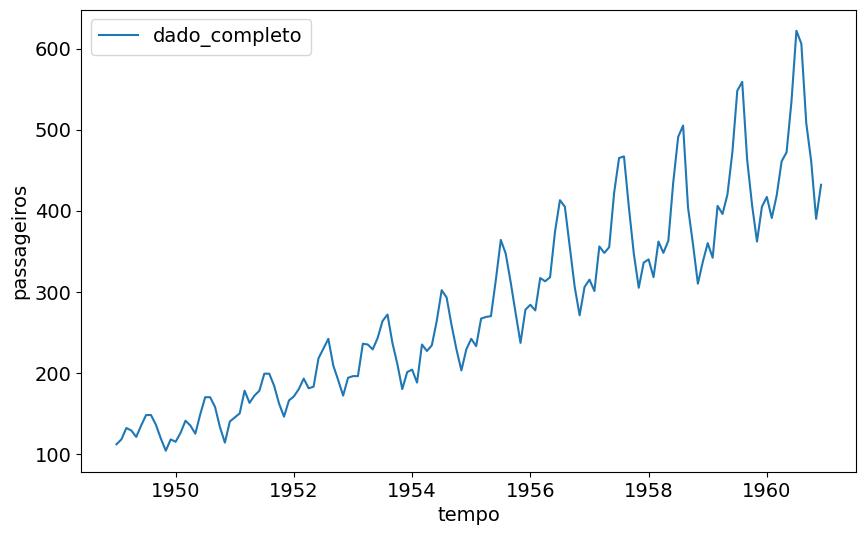

In [4]:
ax = sns.lineplot(x = 'tempo', y= 'passageiros', data = passageiros, label = 'dado_completo')
ax.figure.set_size_inches(10, 6)

# Escalar os dados (normalizar)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc =  StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [7]:
dado_escalado = sc.transform(passageiros)

In [8]:
dado_escalado[:10,:2]

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593],
       [-1.59977995, -1.21538918],
       [-1.5757231 , -1.10664719],
       [-1.55166626, -1.10664719],
       [-1.52760942, -1.20702441],
       [-1.50355258, -1.34922546]])

In [9]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

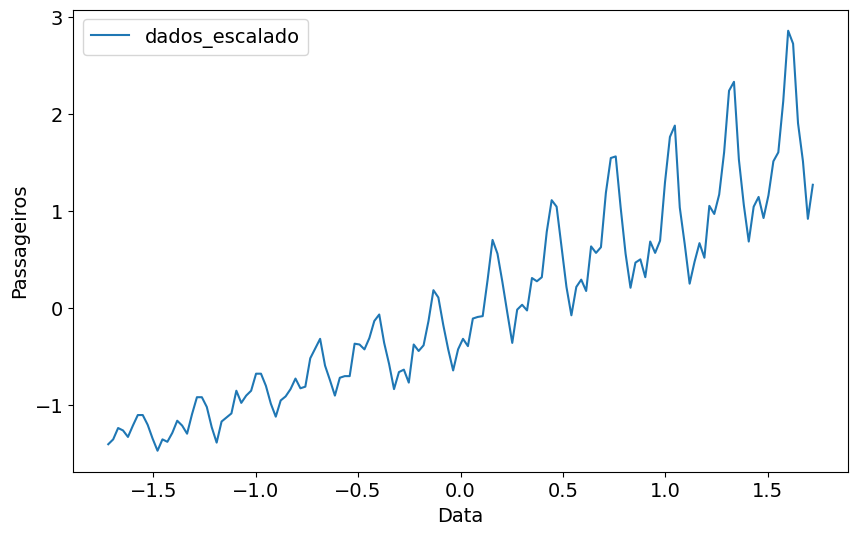

In [10]:
sns.lineplot(x =x, y =y, label = 'dados_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# Dividir os dados em treino e teste

Perceba que a separaçaõ em dados de treino e dados de teste não ocorre com o train_test_split.

O motivo disso é porque queremos prever o que irá acontecer no futuro da série temporal, então o teste é verificar a previsão do modelo. O train_teste_split faz a separação dos dados de forma aleatória sem ser para uma série temporal

In [11]:
tamanho_treino =  int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) -  tamanho_treino

In [12]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]


In [13]:
x_teste = x[tamanho_treino:]
y_teste = y[tamanho_treino:]


Text(0.5, 0, 'Data')

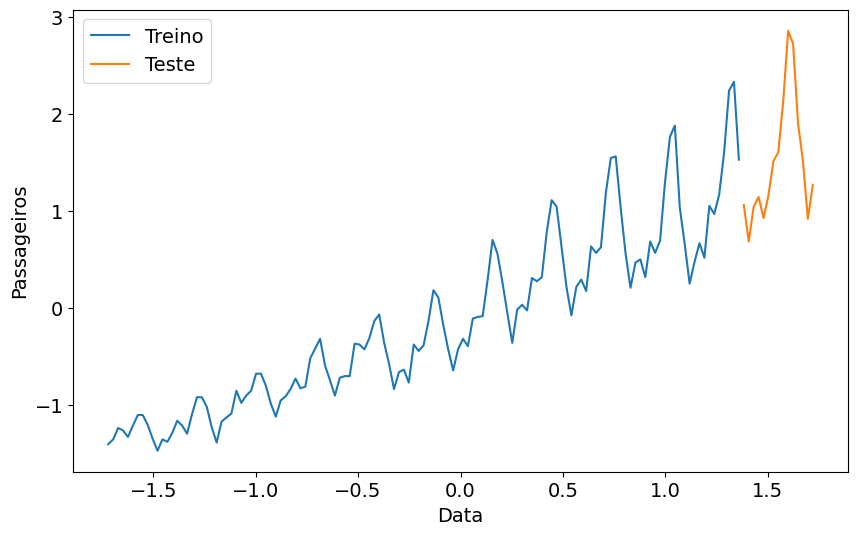

In [14]:
sns.lineplot(x =x_treino, y =y_treino, label = 'Treino')
sns.lineplot(x =x_teste, y =y_teste, label = 'Teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# 1º Previsão: Regressão Linear

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
regressor =  Sequential()
regressor.add(
    Dense(1,input_dim = 1, kernel_initializer = 'Ones',activation = 'linear', use_bias = False))


regressor.compile(loss = 'mean_squared_error',
                  optimizer = 'adam')

In [17]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [18]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 2s 11ms/step - loss: 0.1285


In [19]:
y_predict = regressor.predict(x_treino)
y_predict.shape

5/5 [==============================] - 0s 3ms/step


(129, 1)

Text(0.5, 0, 'Data')

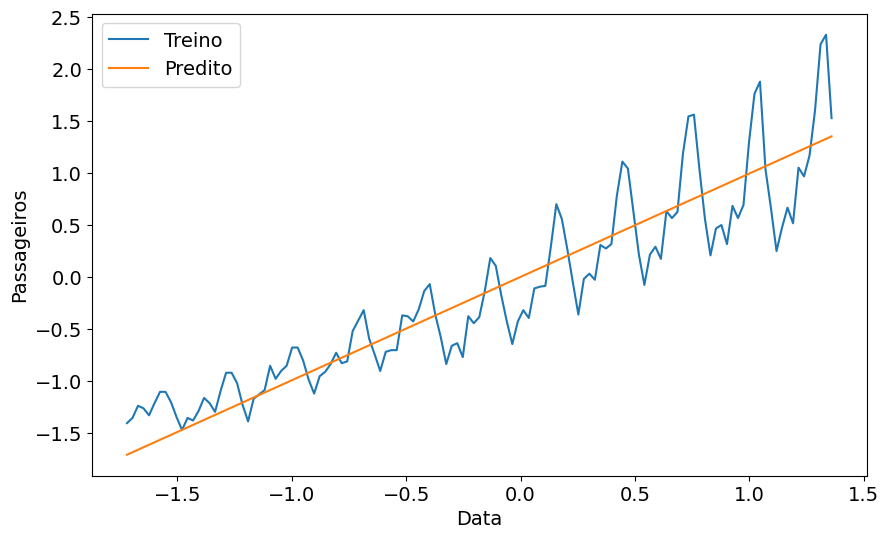

In [20]:
sns.lineplot(x = x_treino, y = y_treino, label = 'Treino')
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'Predito')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [21]:
d = {'tempo': x_treino, 'passageiros': y_predict[:, 0]}
resultados = pd.DataFrame(data = d)
resultados = sc.inverse_transform(resultados)
resultados = pd.DataFrame(resultados, columns = ['tempo', 'passageiros'])
resultados

,tempo,passageiros
0,1949.000000,75.643705
1,1949.083333,78.506018
2,1949.166667,81.368332
3,1949.250000,84.230631
4,1949.333333,87.092945
...,...,...
124,1959.333333,430.569686
125,1959.416667,433.432000
126,1959.500000,436.294299
127,1959.583333,439.156599


Text(0.5, 0, 'Data')

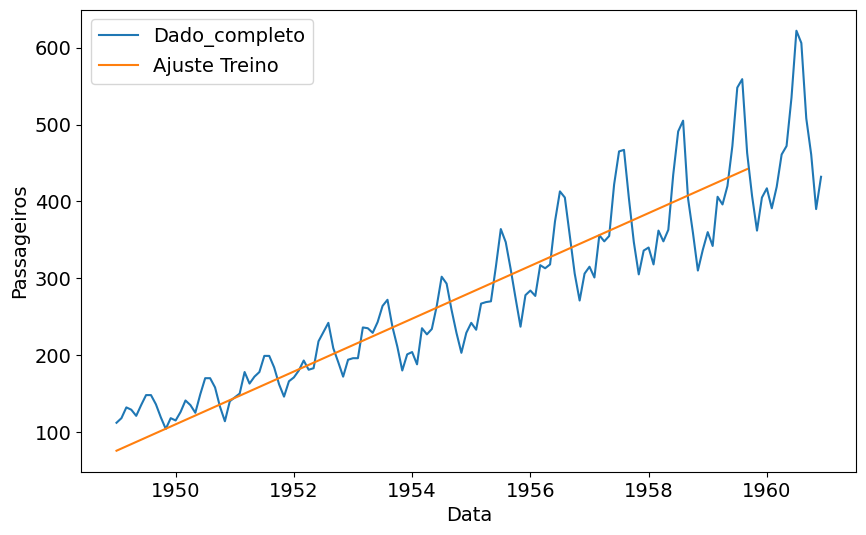

In [22]:
sns.lineplot(x = 'tempo', y = 'passageiros',data = passageiros, label = 'Dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros',data = resultados, label = 'Ajuste Treino')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [23]:
y_predict_teste = regressor.predict(x_teste)

1/1 [==============================] - 0s 55ms/step


In [24]:
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:, 0]}
resultados_teste = pd.DataFrame(data = d)
resultados_teste = sc.inverse_transform(resultados_teste)
resultados_teste = pd.DataFrame(resultados_teste, columns = ['tempo', 'passageiros'])
resultados_teste

,tempo,passageiros
0,1959.750000,444.881226
1,1959.833333,447.743540
2,1959.916667,450.605839
3,1960.000000,453.468138
4,1960.083333,456.330452
5,1960.166667,459.192752
6,1960.250000,462.055065
7,1960.333333,464.917365
8,1960.416667,467.779664
9,1960.500000,470.641978


Text(0.5, 0, 'Data')

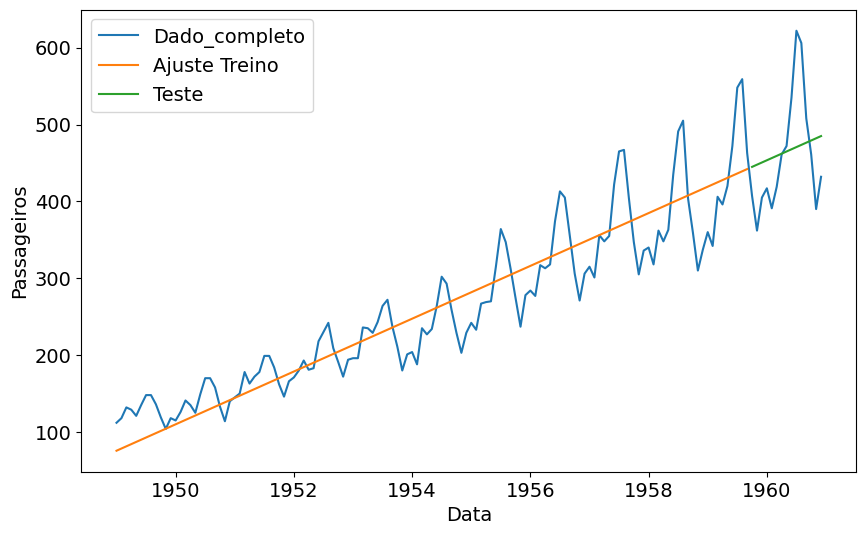

In [25]:
sns.lineplot(x = 'tempo', y = 'passageiros',data = passageiros, label = 'Dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros',data = resultados, label = 'Ajuste Treino')
sns.lineplot(x = 'tempo', y = 'passageiros',data = resultados_teste, label = 'Teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# Adicionar Camadas Intermediárias

O objetivo agora é sair da linhas reta e obter uma previsão mais acurada. Para isso temos que alterar a função de ativação ('activation')

Podemos ter combinações de funções entre as camadas.

A alteração da função faz com que as previsões sigam outra curva.


In [26]:
regressor2 = Sequential()

regressor2.add(Dense(8,input_dim = 1, kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', use_bias = False)
)

regressor2.add(Dense(8, kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', use_bias = False)
)

regressor2.add(Dense(1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))

In [27]:
regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [28]:
regressor2.fit(x_treino, y_treino, epochs = 200)

Epoch 1/200
5/5 [==============================] - 1s 5ms/step - loss: 0.8011
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7982
Epoch 3/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7977
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7972
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7959
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7941
Epoch 7/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7930
Epoch 8/200
5/5 [==============================] - 0s 19ms/step - loss: 0.7919
Epoch 9/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7903
Epoch 10/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7892
Epoch 11/200
5/5 [==============================] - 0s 10ms/step - loss: 0.7891
Epoch 12/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7892
Epoch 13/200
5/5 [==============================] - 0s 5ms/

In [29]:
y_predict = regressor2.predict(x_treino)
y_predict_teste = regressor2.predict(x_teste)

1/1 [==============================] - 0s 134ms/step


Text(0.5, 0, 'Data')

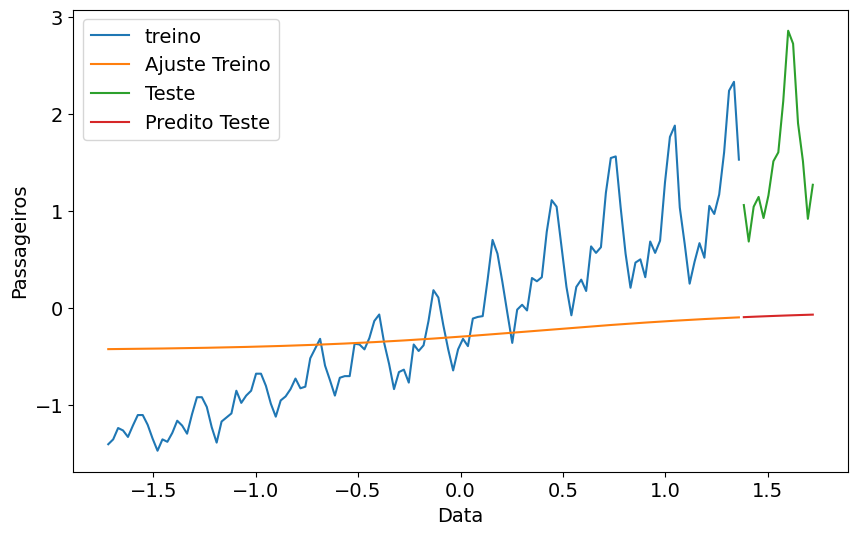

In [30]:
sns.lineplot(x = x_treino,y= y_treino, label='treino')
sns.lineplot(x = x_treino,y= y_predict[:,0], label='Ajuste Treino')
sns.lineplot(x = x_teste,y= y_teste, label='Teste')
sns.lineplot(x = x_teste,y= y_predict_teste[:,0], label='Predito Teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# Numero de passageiros para prever numero de passageiros

In [31]:
vetor = pd.DataFrame(y_treino)[0]
vetor

0     -1.407779
1     -1.357590
2     -1.240483
3     -1.265578
4     -1.332496
         ...   
124    1.168570
125    1.603538
126    2.239260
127    2.331272
128    1.528255
Name: 0, Length: 129, dtype: float64

In [32]:
def separa_dados(vetos, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetos.shape[0]):
    X_novo.append(list(vetos.loc[i - n_passos: i-1]))
    y_novo.append(vetos.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [33]:
X_treino_novo, y_treino_novo = separa_dados(vetor, 1)
X_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [34]:
vetor.shape

(129,)

In [35]:
y_treino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [36]:
y_teste

array([1.05982773, 0.68341317, 1.04309819, 1.14347541, 0.92599144,
       1.16020494, 1.5115252 , 1.60353765, 2.13051803, 2.85825285,
       2.72441656, 1.9046693 , 1.5115252 , 0.91762667, 1.26894693])

In [37]:
vetor2 = pd.DataFrame(y_teste)[0]
X_teste_novo, y_teste_novo = separa_dados(vetor2, 1)


In [38]:
X_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [39]:
regressor3 = Sequential()

regressor3.add(
    Dense(8, input_dim = 1, kernel_initializer = 'ones', activation='linear', use_bias = False)
)

regressor3.add(
    Dense(64, kernel_initializer = 'random_uniform', activation='sigmoid', use_bias = False)
)

regressor3.add(
    Dense(1, kernel_initializer = 'random_uniform', activation='linear', use_bias = False)
)

In [40]:
regressor3.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [41]:
regressor3.fit(X_treino_novo, y_treino_novo, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 14ms/step - loss: 0.7797
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7603
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7360
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7131
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6920
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6716
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6447
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6199
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5915
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5612
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5259
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4891
Epoch 13/100
4/4 [==============================] - 0s 4ms/s

In [42]:
y_predict_novo = regressor3.predict(X_treino_novo)
y_predict_novot = regressor3.predict(X_teste_novo)

1/1 [==============================] - 0s 93ms/step


Text(0.5, 0, 'Data')

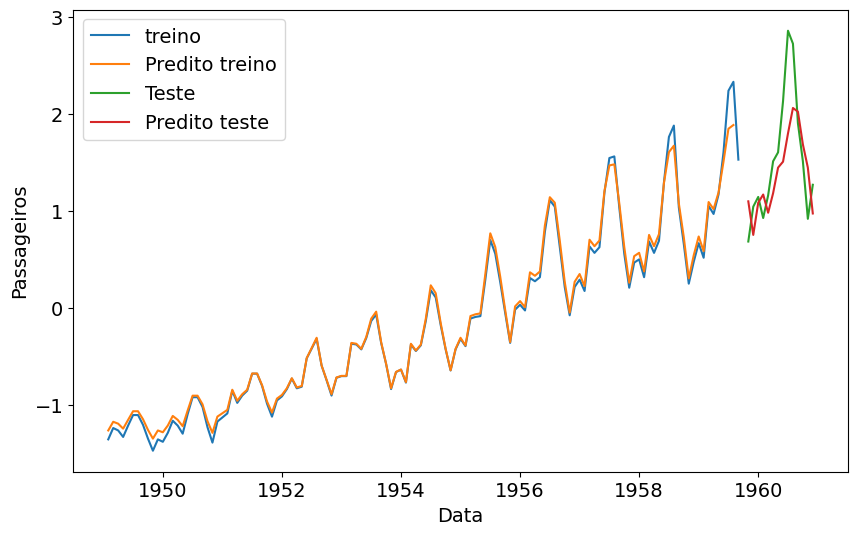

In [43]:
sns.lineplot(x ='tempo',y= y_treino_novo,data = passageiros[1:129], label='treino')
sns.lineplot(x ='tempo',y= pd.DataFrame(y_predict_novo)[0],data = passageiros[1:129], label='Predito treino')

sns.lineplot(x ='tempo',y= y_teste_novo,data = passageiros[130:], label='Teste')
sns.lineplot(x ='tempo',y= pd.DataFrame(y_predict_novot)[0].values,data = passageiros[130:], label='Predito teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [ ]:
X_treino_novo, y_treino_novo = separa_dados(vetor, 4)
X_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

regressor4 = Sequential()

regressor4.add(
    Dense(8, input_dim = 4, kernel_initializer = 'ones', activation='linear', use_bias = False)
)

regressor4.add(
    Dense(64, kernel_initializer = 'random_uniform', activation='sigmoid', use_bias = False)
)

regressor4.add(
    Dense(1, kernel_initializer = 'random_uniform', activation='linear', use_bias = False)
)

regressor4.compile(loss = 'mean_squared_error', optimizer = 'adam')
regressor4.fit(X_treino_novo, y_treino_novo, epochs = 400)

y_predict_novo = regressor4.predict(X_treino_novo)
y_predict_novot = regressor4.predict(X_teste_novo)


Epoch 1/400
4/4 [==============================] - 1s 4ms/step - loss: 0.7237
Epoch 2/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6481
Epoch 3/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5863
Epoch 4/400
4/4 [==============================] - 0s 6ms/step - loss: 0.5176
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 0.4561
Epoch 6/400
4/4 [==============================] - 0s 5ms/step - loss: 0.3924
Epoch 7/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3350
Epoch 8/400
4/4 [==============================] - 0s 5ms/step - loss: 0.2784
Epoch 9/400
4/4 [==============================] - 0s 5ms/step - loss: 0.2342
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 0.1971
Epoch 11/400
4/4 [==============================] - 0s 4ms/step - loss: 0.1741
Epoch 12/400
4/4 [==============================] - 0s 4ms/step - loss: 0.1561
Epoch 13/400
4/4 [==============================] - 0s 4ms/st

Text(0.5, 0, 'Data')

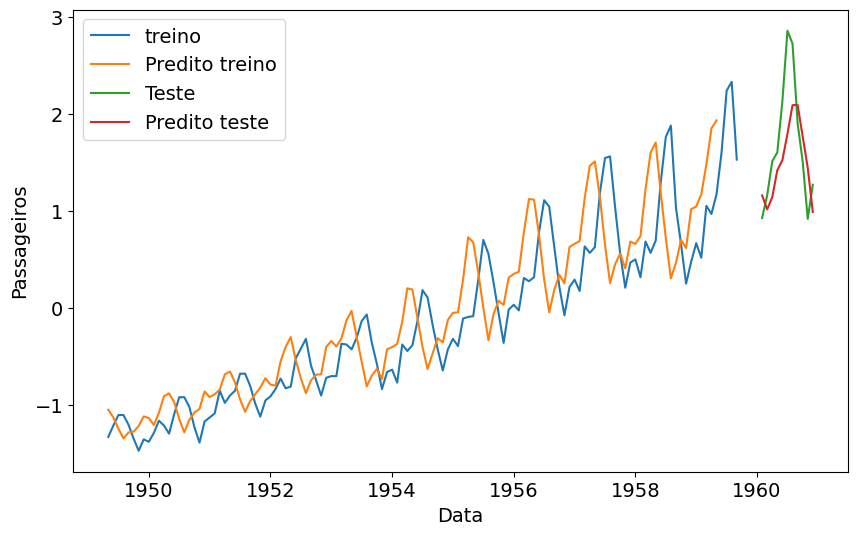

In [46]:
sns.lineplot(x ='tempo',y= y_treino_novo,data = passageiros[4:129], label='treino')
sns.lineplot(x ='tempo',y= pd.DataFrame(y_predict_novo)[0],data = passageiros[4:129], label='Predito treino')

sns.lineplot(x ='tempo',y= y_teste_novo,data = passageiros[133:], label='Teste')
sns.lineplot(x ='tempo',y= pd.DataFrame(y_predict_novot)[0].values,data = passageiros[133:], label='Predito teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# Novos Dados

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

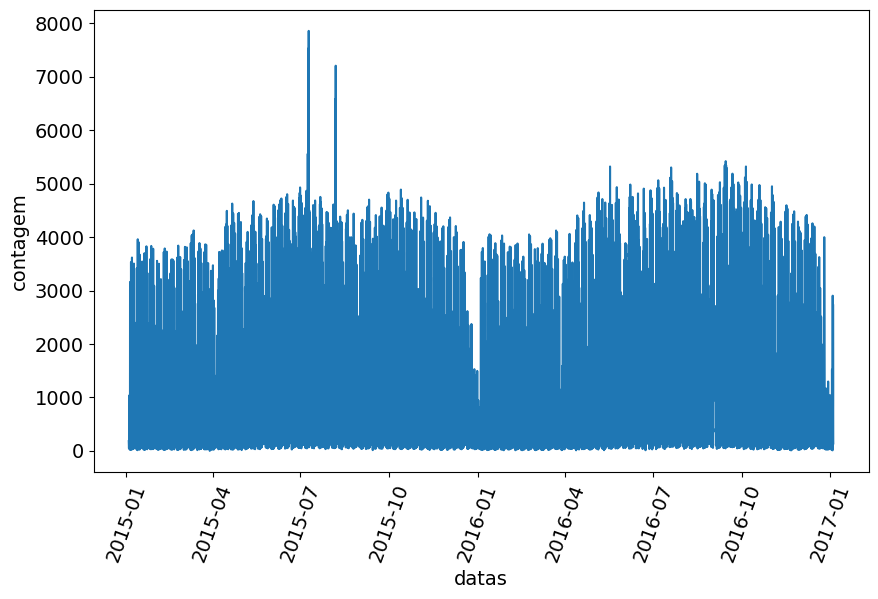

In [50]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')
bike['datas'] = pd.to_datetime(bike['datas'])
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

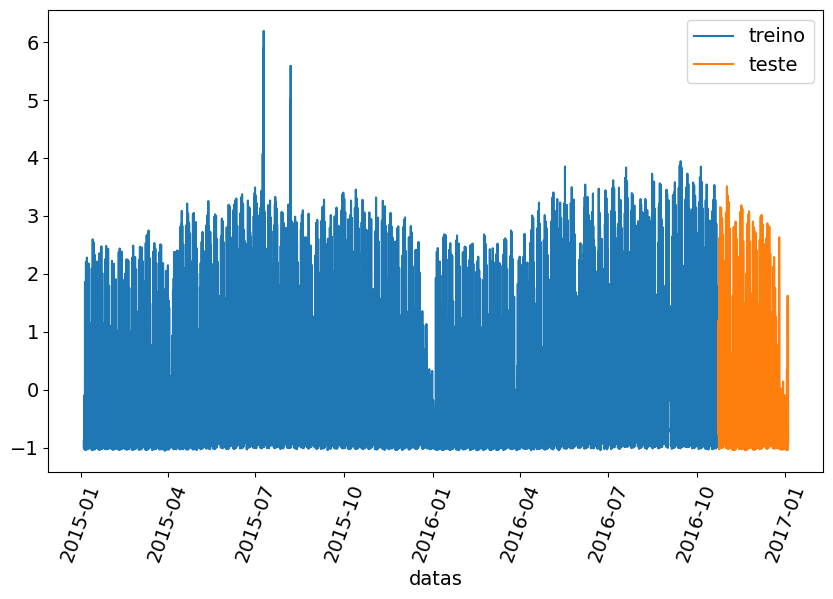

In [51]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))
y = sc2.transform(bike['contagem'].values.reshape(-1,1))


tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70)

In [52]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2,10)

xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [53]:
from tensorflow.keras.layers import LSTM
recorrente = Sequential()

recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [54]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)
y_ajustado = recorrente.predict(xtreino_novo)

Epoch 1/100
490/490 [==============================] - 14s 20ms/step - loss: 0.3022 - val_loss: 0.0830
Epoch 2/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0871 - val_loss: 0.0426
Epoch 3/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0561 - val_loss: 0.0388
Epoch 4/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0488 - val_loss: 0.0458
Epoch 5/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0437 - val_loss: 0.0329
Epoch 6/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0401 - val_loss: 0.0442
Epoch 7/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0384 - val_loss: 0.0293
Epoch 8/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0368 - val_loss: 0.0375
Epoch 9/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0353 - val_loss: 0.0238
Epoch 10/100
490/490 [==============================] - 10s 21ms/step - loss

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

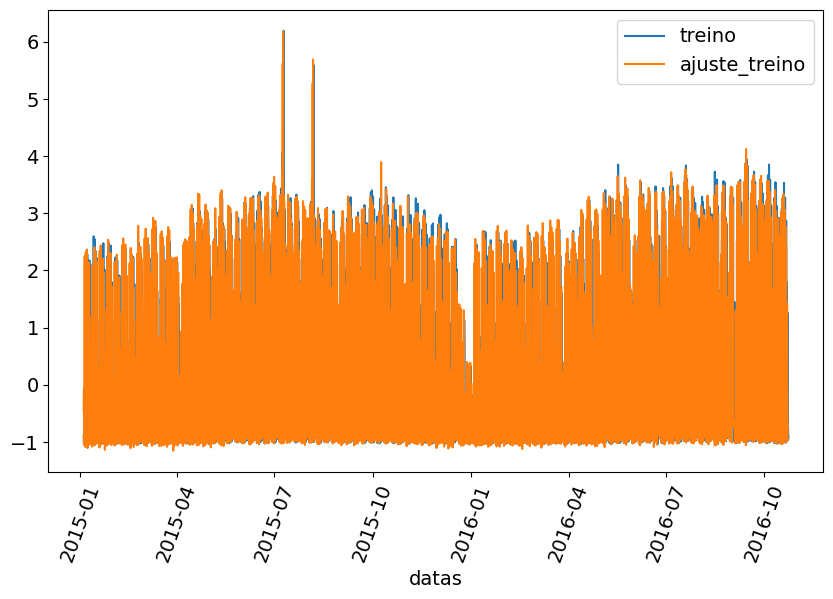

In [55]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70)

In [59]:
y_predito = recorrente.predict(xteste_novo)


55/55 [==============================] - 0s 6ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

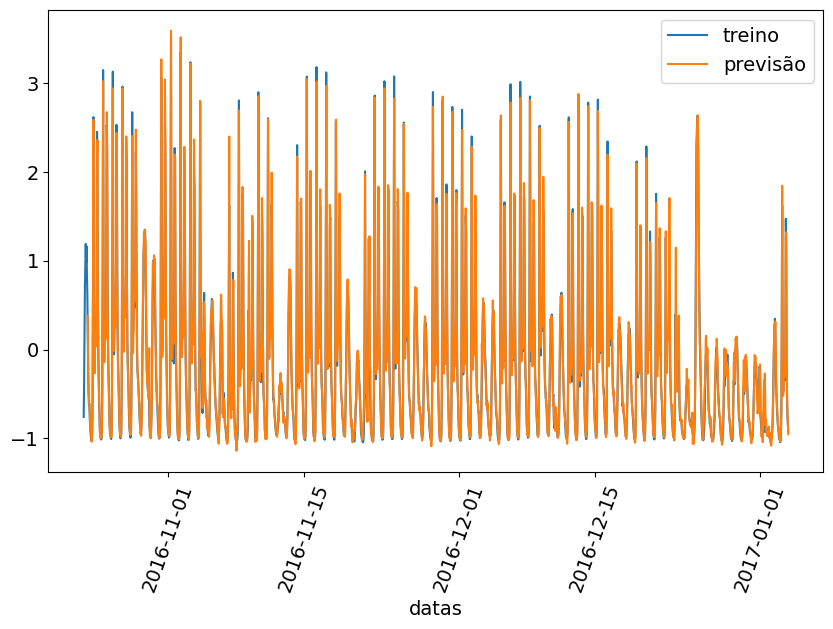

In [65]:
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:],label='treino')
sns.lineplot(x='datas',y=y_predito[:,0],data=bike[tamanho_treino+10:len(bike)],label='previsão')
plt.xticks(rotation=70)

In [66]:
from tensorflow.keras.layers import GRU

In [71]:
recorrente_g = Sequential()

recorrente_g.add(
    GRU(128, input_shape = (xtreino_novo.shape[1],xtreino_novo.shape[2]))
)

recorrente_g.add(Dense(units = 1))

recorrente_g.compile(loss = 'mean_squared_erros', optimizer= 'RMSProp')

recorrente_g.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________
